# Implementation of the hands-on example from the section “Predicting Atomization Energies” in the paper Rupp2015.

## Load data

In [252]:
import numpy as np
from ase.io import read

# Load the molecular structures and atomization energies from the file dsgdb7ae2.xyz.
species = read("dsgdb7ae2.xyz", index=":")

# Count the non-H atoms in each molecule to reproduce Table 3.
count = []
for i in range (len(species)):
    atoms = species[i]
    #print(atoms.symbols)
    del atoms[[atom.index for atom in atoms if atom.symbol=='H']]
    count.append(len(atoms))   
#print(count)

i=0
while count[i] < 1: #zero H
    i += 1
    a = i
    a = 0
#print(a) 

while count[i] < 2: #less than one H
    i += 1
    b = i
#print(b) 

while count[i] < 3: #less than two H
    i += 1
    c = i
#print(c) 
    
while count[i] < 4: #less than three H
    i += 1
    d = i
#print(d) 

while count[i] < 5: #less than four H
    i += 1
    e = i
#print(e) 

while count[i] < 6: #less than five H
    i += 1
    f = i
#print(f) 

while count[i] < 7: #less than six H
    i += 1
    g = i
#print(i) 

i = len(species) #less than seven H
h = i
#print(h) 
 
print(" 1 non-H atoms:" + str(b-0) + "\n", "2 non-H atoms:" + str(c-b) + "\n", "3 non-H atoms:" + str(d-c)+ "\n", 
      "4 non-H atoms:" + str(e-d)+ "\n", "5 non-H atoms:" + str(f-e)+ "\n", "6 non-H atoms:" + str(g-f) + "\n",
      "7 non-H atoms:" + str(h-g))

 1 non-H atoms:1
 2 non-H atoms:3
 3 non-H atoms:12
 4 non-H atoms:43
 5 non-H atoms:157
 6 non-H atoms:935
 7 non-H atoms:5951


In [253]:
# Create a training set and the prediction set
# Select all k molecules with four or fewer non-H atoms. 
# Assign selected molecules to the training set, and all others to the prediction set.

#k_train = 40
#split = (len(species) - k_train)/(1000 - k_train)
#PredictionSet_idx = np.linspace(41, len(species), round(split)).astype(int)
#print(PredictionSet_idx)



In [254]:
# Create a hold-out set (unfinished)
# From the training set, select 100 molecules with five or more non-H atoms, stratified by number of atoms, and assign them to the hold-out set.

#k_holdout = 100






## Use dscribe's implementation of Coulomb matrix (CM)

In [255]:
from dscribe.descriptors import CoulombMatrix

# Setting up the CM descriptor
cm = CoulombMatrix(
    n_atoms_max=23,
    permutation='sorted_l2'
)

In [256]:
from ase.build import molecule
from ase import Atoms

# Molecule created as an ASE.Atoms
species = read("dsgdb7ae2.xyz", index=":")

sample = []
for i in range (len(species)):
    atoms = species[i]
    #print(atoms.symbols)
    sample.append(atoms)   
print(sample[1])


Atoms(symbols='C2H6', pbc=False)


In [257]:
# Create output for multiple system

coulomb_matrices = cm.create(sample, n_jobs=2)  # Parallel
print(coulomb_matrices)
print("flattened", coulomb_matrices.shape)

[[ 36.8581052    5.40834831   5.40832102 ...   0.           0.
    0.        ]
 [ 36.8581052   23.69699443   2.77198579 ...   0.           0.
    0.        ]
 [ 36.8581052   27.04631682   5.52875441 ...   0.           0.
    0.        ]
 ...
 [388.02344103  66.85246943  44.96901484 ...   0.           0.
    0.        ]
 [388.02344103  66.66939757  45.19845041 ...   0.           0.
    0.        ]
 [388.02344103  66.66601077  45.10724451 ...   0.           0.
    0.        ]]
flattened (7102, 529)


## Visualize data

In [258]:
# set CoulombMatrix as features
x = coulomb_matrices

# set energies as target labels

data_total_energies = [float(list(molecule.info)[1]) for molecule in species]
#print(data_total_energies)
y = data_total_energies

#print(len(y))

In [259]:
import math, random

rand_mol = random.randint(0, len(y))
print(x[rand_mol])

[73.51669472 23.42846108 33.76726154 20.85821118 20.18582721 33.96518833
 20.57718518  3.80857145  3.07089082  3.80058253  2.41620719  2.38434087
  3.87364555  3.01385734  2.39332958  0.          0.          0.
  0.          0.          0.          0.          0.         23.42846108
 73.51669472 20.85819466 33.76707147 33.96530254 20.1857169  20.57720706
  3.07089211  3.80857604  2.41621037  3.80056082  3.87366553  2.38433381
  2.39333353  3.01385268  0.          0.          0.          0.
  0.          0.          0.          0.         33.76726154 20.85819466
 36.8581052  17.08263776 23.67042086 16.15861036 24.029934    1.95857856
  2.74751667  5.40306211  1.88728379  2.74966301  2.05943888  2.72980039
  2.71759087  0.          0.          0.          0.          0.
  0.          0.          0.         20.85821118 33.76707147 17.08263776
 36.8581052  16.15864922 23.67031034 24.03013645  2.74752261  1.95857564
  1.88728768  5.40303304  2.0594442   2.74965876  2.71760657  2.7297978
  0

<Figure size 432x288 with 0 Axes>

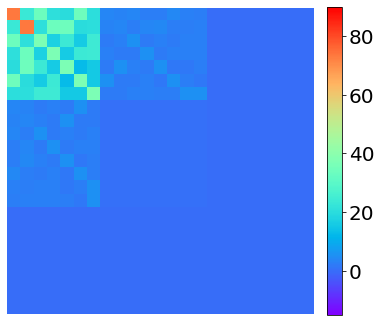

In [260]:
# Visualize the Coulomb matrix of the random molecule.

import matplotlib.pyplot as plt

shape = (23, 23)
mat = x[rand_mol].reshape(shape)

plt.figure()
plt.figure(figsize = (6,6))
plt.imshow(mat, origin="upper", cmap='rainbow', vmin=-15, vmax=90, interpolation='nearest')
plt.colorbar(fraction=0.046, pad=0.04).ax.tick_params(labelsize=20)
plt.axis('off')
plt.show()

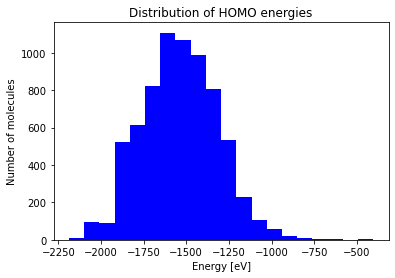

Mean value of HOMO energies in QM7 dataset: -1536.32 eV


In [261]:
# Visualize the target data by plotting the distribution of HOMO energies in the dataset.

plt.hist(y, bins=20, density=False, facecolor='blue')
plt.xlabel("Energy [eV]")
plt.ylabel("Number of molecules")
plt.title("Distribution of HOMO energies")
plt.show()

## mean value of distribution
print("Mean value of HOMO energies in QM7 dataset: %0.2f eV" %np.mean(y))

## Setting data

In [262]:
## shuffle the data

c = list(zip(x, y))
random.shuffle(c)

x, y = zip(*c)

x = np.array(x)
y = np.array(y)

print(y)


[-1219.34 -1643.25 -1018.42 ... -1804.51 -1581.74 -1522.34]


In [263]:
# decide how many samples to take from the database for training and testing
n_train = 6000
n_test = 1000

# split data in training and test
# take first n_train molecules for training
x_train  = x[0:n_train] 
y_train = y[0:n_train]

# take the next n_test data for testing
x_test = x[n_train:n_train + n_test]
y_test = y[n_train:n_train + n_test]

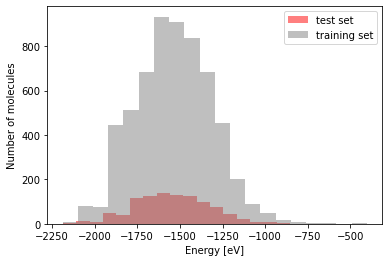

Mean value of HOMO energies in training set: -1534.53 eV
Mean value of HOMO energies in test set: -1544.94 eV


In [264]:
plt.hist(y_test, bins=20, density=False, alpha=0.5, facecolor='red', label='test set')
plt.hist(y_train, bins=20, density=False, alpha=0.5, facecolor='gray', label='training set')
plt.xlabel("Energy [eV]")
plt.ylabel("Number of molecules")
plt.legend()
plt.show()

## mean value of distributions
print("Mean value of HOMO energies in training set: %0.2f eV" %np.mean(y_train))
print("Mean value of HOMO energies in test set: %0.2f eV" %np.mean(y_test))

## Use sklearn's implementation of kernel ridge regression (KRR) model 

In [265]:
print(x_train.shape)

(6000, 529)


In [266]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

# set up grids for alpha and gamma hyperparameters. 
# first value: lower bound; second value: upper bound; 
# third value: number of points to evaluate (here set to '3' --> '-2', '-1' and '0' are evaluated)
# --> make sure to change third value as well when changing the bounds!
alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3 ## choose into how many parts training set is divided for cross-validation
kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

## define settings for grid search routine in scikit-learn with above defined grids as input

grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=1000)  ## produces detailed output statements of grid search 
                                          # routine so we can see what is computed
    
# call the fit function in scikit-learn which fits the Coulomb matrices in the training set 
# to their corresponding HOMO energies.
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3; 1/9] START alpha=0.0001, gamma=0.0001, kernel=rbf......................
[CV 1/3; 1/9] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-10.801 total time=   1.0s
[CV 2/3; 1/9] START alpha=0.0001, gamma=0.0001, kernel=rbf......................
[CV 2/3; 1/9] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-10.569 total time=   0.8s
[CV 3/3; 1/9] START alpha=0.0001, gamma=0.0001, kernel=rbf......................
[CV 3/3; 1/9] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-10.599 total time=   0.8s
[CV 1/3; 2/9] START alpha=0.0001, gamma=0.001, kernel=rbf.......................
[CV 1/3; 2/9] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-143.328 total time=   0.9s
[CV 2/3; 2/9] START alpha=0.0001, gamma=0.001, kernel=rbf.......................
[CV 2/3; 2/9] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-142.836 total time=   0.9s
[CV 3/3; 2/9] START alpha=0.0001, gamma=0.001, kernel=rbf..................

GridSearchCV(cv=3, estimator=KernelRidge(),
             param_grid=[{'alpha': array([0.0001, 0.001 , 0.01  ]),
                          'gamma': array([0.0001, 0.001 , 0.01  ]),
                          'kernel': ['rbf']}],
             scoring='neg_mean_absolute_error', verbose=1000)

In [267]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(-means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

10.656 (+/-0.206) for {'alpha': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
140.790 (+/-6.497) for {'alpha': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}
1503.919 (+/-4.295) for {'alpha': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'}
10.624 (+/-0.205) for {'alpha': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
140.881 (+/-6.498) for {'alpha': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
1503.946 (+/-4.296) for {'alpha': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
11.604 (+/-0.155) for {'alpha': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
141.785 (+/-6.517) for {'alpha': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
1504.209 (+/-4.308) for {'alpha': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}


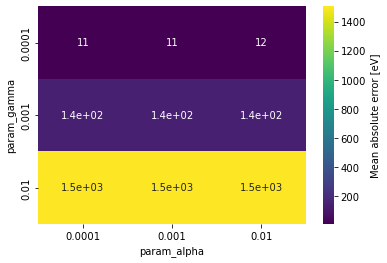

The best combinations of parameters are {'alpha': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'} with a score of 10.624 eV on the validation set.


In [268]:
import pandas as pd
import seaborn as sns

results = pd.DataFrame(grid_search.cv_results_)
#pd.DataFrame(grid_search.cv_results_)

pvt = pd.pivot_table(results, values='mean_test_score', 
                     index='param_gamma', columns='param_alpha')
heatmap = sns.heatmap(-pvt, annot=True, cmap='viridis', cbar_kws={'label': "Mean absolute error [eV]"})
figure = heatmap.get_figure()
plt.show()


print("The best combinations of parameters are %s with a score of %0.3f eV on the validation set."
      % (grid_search.best_params_, -grid_search.best_score_))

Mean absolute error on test set: 8.721 eV


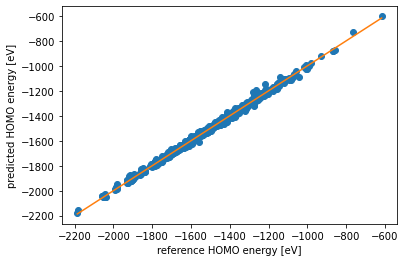

R^2 score on test set: 0.997


In [269]:
# predicted HOMO energies for all test molecules

y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                     # of hyperparameters from grid search

print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

# do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference HOMO energy [eV]')
plt.ylabel('predicted HOMO energy [eV]')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred))

## Compare your results for CM to Rupp’s. 

## Now use dscribe's implementation of SOAP representation and compare predictions to CM.

In [270]:
from dscribe.descriptors import SOAP

# Setting up the SOAP descriptor
soap = SOAP(
    species=["H", "C", "O", "N", "S"],
    periodic=False,
    r_cut=6.0,
    n_max=3,
    l_max=4,
)

In [271]:
# Create SOAP output for multiple system
import numpy as np

samples = sample[:]
positions = np.zeros((len(species),1), dtype=int)
coulomb_matrices = soap.create(samples, positions, n_jobs=2)  # Parallel
#print(coulomb_matrices.shape)
coulomb_matrices = coulomb_matrices.reshape(7102,600)
#print(coulomb_matrices.shape)

In [272]:
# set CoulombMatrix as features
x = coulomb_matrices

# set energies as target labels

data_total_energies = [float(list(molecule.info)[1]) for molecule in species]
#print(data_total_energies)
y = data_total_energies

#print(len(y))

In [273]:
import math, random

rand_mol = random.randint(0, len(y))
print(x[rand_mol])

[ 2.02347061e-01  1.95241377e+00  9.86463671e+00  1.88385219e+01
  9.51822699e+01  4.80911644e+02  3.15803311e-01 -1.91831280e+00
  4.69735227e+00  1.27550567e+01 -2.39727434e+01  9.21561582e+01
  7.67823070e-02 -4.79451308e-01  1.37664995e+00  3.05281848e+00
 -8.26716290e+00  2.73392999e+01  1.28831972e-02 -1.06882302e-01
  1.82699419e-01  8.97590116e-01 -1.47677412e+00  3.10348402e+00
  1.46123605e-03 -1.49554804e-02  1.58848834e-02  1.53326568e-01
 -1.54649642e-01  1.10847702e+00  1.06592584e-01  1.91511009e-01
  3.80814917e+00  1.02849445e+00  1.84785848e+00  3.67442099e+01
  5.19650304e+00  9.33636757e+00  1.85651366e+02  1.43252802e-01
 -2.08953780e-01  4.24501071e+00 -8.11582583e-01  1.32274523e+00
 -2.38760086e+01  2.36219682e+00 -2.09055307e+00  7.36675322e+01
  5.39108216e-02 -2.62555837e-01  1.46865073e+00 -3.36868116e-01
  1.64231481e+00 -9.11386572e+00  9.74183154e-01 -4.56349910e+00
  2.76979882e+01  1.28008939e-02 -9.89645825e-02  3.51279475e-01
 -1.02034313e-01  7.93863

<Figure size 432x288 with 0 Axes>

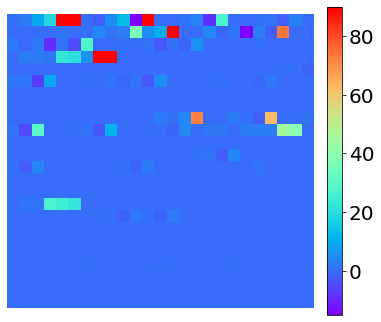

In [274]:
# Visualize the Coulomb matrix of the random molecule.

import matplotlib.pyplot as plt

#shape = (23, 23)
shape = (24, -1)
mat = x[[rand_mol]].reshape(shape)

plt.figure()
plt.figure(figsize = (6,6))
plt.imshow(mat, origin="upper", cmap='rainbow', vmin=-15, vmax=90, interpolation='nearest')
plt.colorbar(fraction=0.046, pad=0.04).ax.tick_params(labelsize=20)
plt.axis('off')
plt.show()

In [275]:
print(mat.shape)

(24, 25)


In [276]:
from ase.build import molecule

# Molecule created as an ASE.Atoms
water = molecule("H2O")

# Create SOAP output for the system
soap_water = soap.create(water, positions=[0])

#print(soap_water)
#print(soap_water.shape)

# Create output for multiple system
samples = [molecule("H2O"), molecule("NO2"), molecule("CO2")]
positions = [[0], [0], [0]]
coulomb_matrices = soap.create(samples, positions, n_jobs=2)  # Parallel
print(coulomb_matrices.shape)

(3, 1, 600)


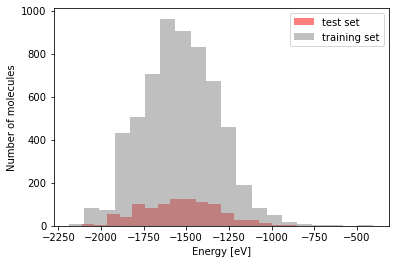

Mean value of HOMO energies in training set: -1536.68 eV
Mean value of HOMO energies in test set: -1535.52 eV


In [277]:
## shuffle the data

c = list(zip(x, y))
random.shuffle(c)

x, y = zip(*c)

x = np.array(x)
y = np.array(y)
#print(y)

# decide how many samples to take from the database for training and testing
n_train = 6000
n_test = 1000

# split data in training and test
# take first n_train molecules for training
x_train  = x[0:n_train] 
y_train = y[0:n_train]

# take the next n_test data for testing
x_test = x[n_train:n_train + n_test]
y_test = y[n_train:n_train + n_test]

plt.hist(y_test, bins=20, density=False, alpha=0.5, facecolor='red', label='test set')
plt.hist(y_train, bins=20, density=False, alpha=0.5, facecolor='gray', label='training set')
plt.xlabel("Energy [eV]")
plt.ylabel("Number of molecules")
plt.legend()
plt.show()

## mean value of distributions
print("Mean value of HOMO energies in training set: %0.2f eV" %np.mean(y_train))
print("Mean value of HOMO energies in test set: %0.2f eV" %np.mean(y_test))

In [281]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

# set up grids for alpha and gamma hyperparameters. 
# first value: lower bound; second value: upper bound; 
# third value: number of points to evaluate (here set to '3' --> '-2', '-1' and '0' are evaluated)
# --> make sure to change third value as well when changing the bounds!
alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3 ## choose into how many parts training set is divided for cross-validation
kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

## define settings for grid search routine in scikit-learn with above defined grids as input

grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=1000)  ## produces detailed output statements of grid search 
                                          # routine so we can see what is computed
    
# call the fit function in scikit-learn which fits the Coulomb matrices in the training set 
# to their corresponding HOMO energies.
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3; 1/9] START alpha=0.0001, gamma=0.0001, kernel=rbf......................
[CV 1/3; 1/9] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-153.033 total time=   1.1s
[CV 2/3; 1/9] START alpha=0.0001, gamma=0.0001, kernel=rbf......................
[CV 2/3; 1/9] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-152.747 total time=   0.9s
[CV 3/3; 1/9] START alpha=0.0001, gamma=0.0001, kernel=rbf......................
[CV 3/3; 1/9] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-150.079 total time=   1.0s
[CV 1/3; 2/9] START alpha=0.0001, gamma=0.001, kernel=rbf.......................
[CV 1/3; 2/9] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-605.490 total time=   0.9s
[CV 2/3; 2/9] START alpha=0.0001, gamma=0.001, kernel=rbf.......................
[CV 2/3; 2/9] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-613.595 total time=   1.0s
[CV 3/3; 2/9] START alpha=0.0001, gamma=0.001, kernel=rbf...............

GridSearchCV(cv=3, estimator=KernelRidge(),
             param_grid=[{'alpha': array([0.0001, 0.001 , 0.01  ]),
                          'gamma': array([0.0001, 0.001 , 0.01  ]),
                          'kernel': ['rbf']}],
             scoring='neg_mean_absolute_error', verbose=1000)

In [282]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(-means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

151.953 (+/-2.660) for {'alpha': 0.0001, 'gamma': 0.0001, 'kernel': 'rbf'}
603.019 (+/-19.603) for {'alpha': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}
1256.303 (+/-17.669) for {'alpha': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'}
116.634 (+/-3.998) for {'alpha': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
586.710 (+/-22.589) for {'alpha': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
1253.696 (+/-17.323) for {'alpha': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
102.916 (+/-6.267) for {'alpha': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
581.133 (+/-21.147) for {'alpha': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
1253.324 (+/-16.868) for {'alpha': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}


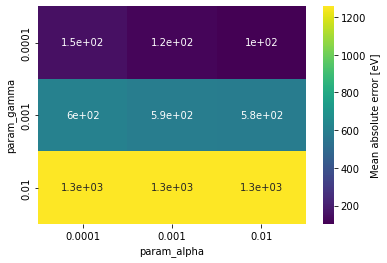

The best combinations of parameters are {'alpha': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'} with a score of 102.916 eV on the validation set.


In [283]:
import pandas as pd
import seaborn as sns

results = pd.DataFrame(grid_search.cv_results_)
#pd.DataFrame(grid_search.cv_results_)

pvt = pd.pivot_table(results, values='mean_test_score', 
                     index='param_gamma', columns='param_alpha')
heatmap = sns.heatmap(-pvt, annot=True, cmap='viridis', cbar_kws={'label': "Mean absolute error [eV]"})
figure = heatmap.get_figure()
plt.show()


print("The best combinations of parameters are %s with a score of %0.3f eV on the validation set."
      % (grid_search.best_params_, -grid_search.best_score_))

Mean absolute error on test set: 92.523 eV


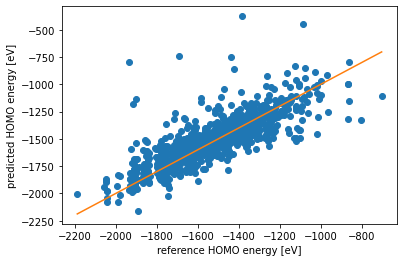

R^2 score on test set: 0.621


In [284]:
# predicted HOMO energies for all test molecules

y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                     # of hyperparameters from grid search

print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

# do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference HOMO energy [eV]')
plt.ylabel('predicted HOMO energy [eV]')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred))